### Instructions

Thank you for your interest in GoodRx! The next step in the Operations Associate interview process is a take-home exercise. Aim to spend no more than 1.5 hours on this exercise. 


One of the responsibilities of the Operations Associate will be to help track and draw insights about clinician activity on our platform. 

Please reference the “Take-Home_Terminated Providers” spreadsheet, which contains hypothetical data including which group the provider is in, start date, termination date, and termination reason. Create a 1 - 2 page report or slide deck with an analysis of these terminations and your recommendations. 

### Start EDA 
Exploratory Data Analysis

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_excel('Take-Home_Terminated Providers (1) (1).xlsx')
df

,Provider ID,Provider Group,Start Date,Termination Date,Termination Reason
0,ID1,Group A,2020-04-28,2021-05-17,Provider chose to leave
1,ID2,Group A,2019-09-16,2021-05-17,Medical error
2,ID3,Group A,2020-03-18,2021-05-17,Provider chose to leave
3,ID4,Group B,2020-02-27,2021-05-16,Not a good fit
4,ID5,Group B,2020-11-02,2021-05-16,Provider chose to leave
...,...,...,...,...,...
123,ID156,Group A,2019-12-18,2020-01-01,Not a good fit
124,ID157,Group A,2019-12-18,2019-12-21,Provider chose to leave
125,ID158,Group A,2019-12-27,2019-12-01,Not a good fit
126,ID167,Group A,2019-05-24,2019-09-09,Provider chose to leave


In [98]:
# Shape of our dataset
df.shape

(128, 6)

In [135]:
# Info our dataset
df.info()

# Describe our dataset
#df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Provider ID         128 non-null    object        
 1   Provider Group      128 non-null    object        
 2   Start Date          128 non-null    datetime64[ns]
 3   Termination Date    128 non-null    datetime64[ns]
 4   Termination Reason  128 non-null    object        
 5   days                128 non-null    int64         
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 6.1+ KB


check if there are **null values in each column**

In [17]:
columns = ['Provider ID', 'Provider Group', 'Start Date', 'Termination Date', 'Termination Reason']

for col in columns:
    if df[col].isnull().any() == True:
        print(f'There is null values in:', col)
    else: 
        print(f'No null values in:', col)

No null values in: Provider ID
No null values in: Provider Group
No null values in: Start Date
No null values in: Termination Date
No null values in: Termination Reason


In [18]:
# the different provider groups
df['Provider Group'].unique()

array(['Group A', 'Group B', 'Group C'], dtype=object)

In [71]:
# min + max of Start Date and Termination Date
print(f'Earliest Start Date: ', min(df['Start Date']))
print(f'Latest Start Date: ', max(df['Start Date']))
print(' ')
print(f'Earliest Termination Date: ', min(df['Termination Date']))
print(f'Latest Termination Date: ', max(df['Termination Date']))

Earliest Start Date:  2019-01-02 00:00:00
Latest Start Date:  2021-04-20 00:00:00
 
Earliest Termination Date:  2019-03-03 00:00:00
Latest Termination Date:  2021-05-17 00:00:00


No weird Start or Termination Dates. Move forward

add **new column "days"** to calculate how long the provider was with us

In [22]:
df['days'] = (df['Termination Date'] - df['Start Date']).dt.days
df

,Provider ID,Provider Group,Start Date,Termination Date,Termination Reason,days
0,ID1,Group A,2020-04-28,2021-05-17,Provider chose to leave,384
1,ID2,Group A,2019-09-16,2021-05-17,Medical error,609
2,ID3,Group A,2020-03-18,2021-05-17,Provider chose to leave,425
3,ID4,Group B,2020-02-27,2021-05-16,Not a good fit,444
4,ID5,Group B,2020-11-02,2021-05-16,Provider chose to leave,195
...,...,...,...,...,...,...
123,ID156,Group A,2019-12-18,2020-01-01,Not a good fit,14
124,ID157,Group A,2019-12-18,2019-12-21,Provider chose to leave,3
125,ID158,Group A,2019-12-27,2019-12-01,Not a good fit,-26
126,ID167,Group A,2019-05-24,2019-09-09,Provider chose to leave,108


**negative days??** (Is this an error?) How many of these do we have + which are they

In [25]:
df[df['days'] < 0]

,Provider ID,Provider Group,Start Date,Termination Date,Termination Reason,days
119,ID147,Group B,2020-04-07,2020-04-01,Provider chose to leave,-6
125,ID158,Group A,2019-12-27,2019-12-01,Not a good fit,-26
127,ID177,Group A,2019-12-18,2019-03-03,Medical error,-290


Moving forward, these 3 rows will be dropped from analysis until further confirmation.

In [31]:
# drop negative days rows (by index)
# rename to df_2 (df is original dataset, no drop)
df_2 = df.drop([119, 125, 127])
df_2

,Provider ID,Provider Group,Start Date,Termination Date,Termination Reason,days
0,ID1,Group A,2020-04-28,2021-05-17,Provider chose to leave,384
1,ID2,Group A,2019-09-16,2021-05-17,Medical error,609
2,ID3,Group A,2020-03-18,2021-05-17,Provider chose to leave,425
3,ID4,Group B,2020-02-27,2021-05-16,Not a good fit,444
4,ID5,Group B,2020-11-02,2021-05-16,Provider chose to leave,195
...,...,...,...,...,...,...
121,ID153,Group A,2020-01-14,2020-02-07,Provider chose to leave,24
122,ID154,Group A,2019-11-14,2020-01-24,Provider chose to leave,71
123,ID156,Group A,2019-12-18,2020-01-01,Not a good fit,14
124,ID157,Group A,2019-12-18,2019-12-21,Provider chose to leave,3


### Visualizations of data

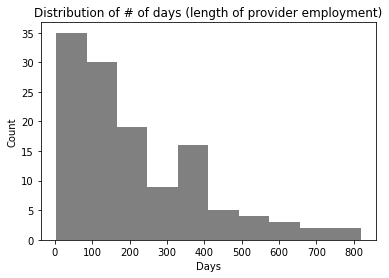

In [137]:
# histogram of how long physicians are with us
plt.hist(df_2['days'], color='gray')
plt.title("Distribution of # of days (length of provider employment)")
plt.xlabel("Days")
plt.ylabel("Count")
plt.show()

In [148]:
# how many (%) providers stays with GoodRx over 1 year (365 days)
num_providers = len(df_2[df_2['days'] > 365])
percentage = (num_providers / len(df_2['days'])) *100
print(f'# of providers who stay for over 1 year:', num_providers)
print(f'This makes up', percentage, '% of the whole dataset.')

# of providers who stay for over 1 year: 21
This makes up 16.8 % of the whole dataset.


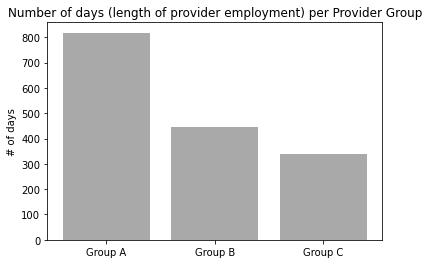

In [140]:
# bar plot of how long physicians are with us segmented by Provider Group
plt.bar(df_2['Provider Group'], df_2['days'], color='darkgray')
plt.title("Number of days (length of provider employment) per Provider Group")
plt.ylabel("# of days")
plt.show()

Group A has the most days with us, but is this driven by bigger number of providers?

In [65]:
for group in provider_groups:
    print(f'Number of providers in', group, ': ', len(df_2[df_2['Provider Group'] == group]))

Number of providers in Group A :  36
Number of providers in Group B :  83
Number of providers in Group C :  6


No, Group A and Group C have large amounts of days with significantly less providers than Group B. The turnover rate for Group B seems to be unusually high. Let's take a deeper dive into Group B

### Focus on high turnover rate Group B

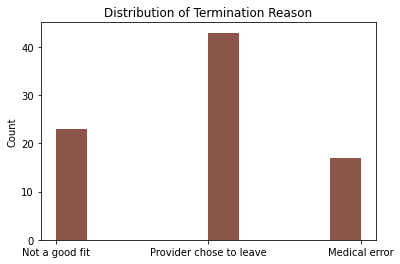

In [128]:
# Group B termination reason 
df_GroupB = df_2[df_2['Provider Group']=='Group B']

plt.hist(df_GroupB['Termination Reason'], color='tab:brown')
plt.title("Distribution of Termination Reason")
#plt.xlabel("Termination Reason")
plt.ylabel("Count")
plt.show()

In [149]:
# how many (%) of providers in Group B leave due to "Provider chose to leave"
num_providers = len(df_GroupB[df_GroupB['Termination Reason'] == "Provider chose to leave"])
percentage = (num_providers / len(df_GroupB['Termination Reason'])) *100
print(f'# of providers who chose to leave:', num_providers)
print(f'This makes up', percentage, '% of the Group B dataset.')

# of providers who chose to leave: 43
This makes up 51.80722891566265 % of the Group B dataset.


compare this to other Groups (A and C)

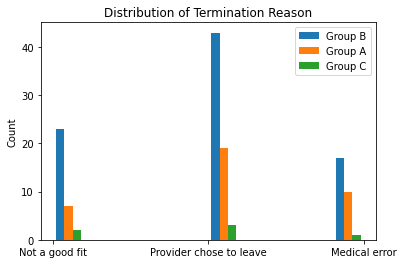

In [94]:
# Compare different Group termination reason 
df_GroupB = df_2[df_2['Provider Group']=='Group B']
df_GroupA = df_2[df_2['Provider Group']=='Group A']
df_GroupC = df_2[df_2['Provider Group']=='Group C']

#fig, ax1 = plt.subplots()
plt.hist([df_GroupB['Termination Reason'], df_GroupA['Termination Reason'], df_GroupC['Termination Reason']], 
        label=['Group B', 'Group A', 'Group C'])
plt.title("Distribution of Termination Reason")
#plt.xlabel("Termination Reason")
plt.legend()
plt.ylabel("Count")
plt.show()

Trends are similar for all 3 groups, so let's look at the relationship between Termination Reason and days 

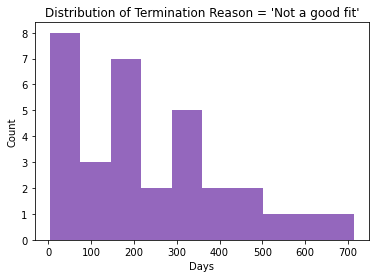

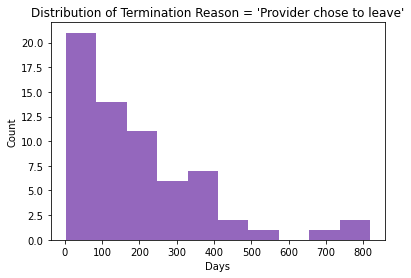

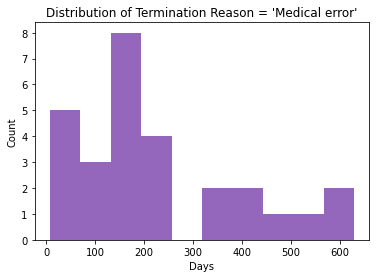

In [131]:
plt.hist(df_2[df_2['Termination Reason']=='Not a good fit']['days'], color='tab:purple')
plt.title("Distribution of Termination Reason = 'Not a good fit'")
plt.xlabel("Days")
plt.ylabel("Count")
plt.show()

plt.hist(df_2[df_2['Termination Reason']=='Provider chose to leave']['days'], color='tab:purple')
plt.title("Distribution of Termination Reason = 'Provider chose to leave'")
plt.xlabel("Days")
plt.ylabel("Count")
plt.show()

plt.hist(df_2[df_2['Termination Reason']=='Medical error']['days'], color='tab:purple')
plt.title("Distribution of Termination Reason = 'Medical error'")
plt.xlabel("Days")
plt.ylabel("Count")
plt.show()

Any differences when segmenting by **Group B**?

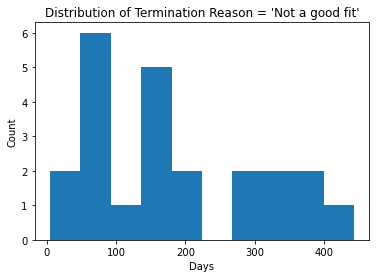

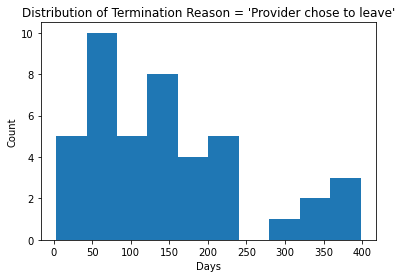

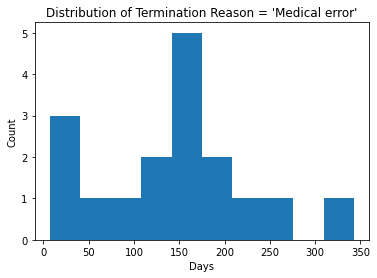

In [117]:
plt.hist(df_GroupB[df_GroupB['Termination Reason']=='Not a good fit']['days'])
plt.title("Distribution of Termination Reason = 'Not a good fit'")
plt.xlabel("Days")
plt.ylabel("Count")
plt.show()

plt.hist(df_GroupB[df_GroupB['Termination Reason']=='Provider chose to leave']['days'])
plt.title("Distribution of Termination Reason = 'Provider chose to leave'")
plt.xlabel("Days")
plt.ylabel("Count")
plt.show()

plt.hist(df_GroupB[df_GroupB['Termination Reason']=='Medical error']['days'])
plt.title("Distribution of Termination Reason = 'Medical error'")
plt.xlabel("Days")
plt.ylabel("Count")
plt.show()

Compare segmentation for all groups

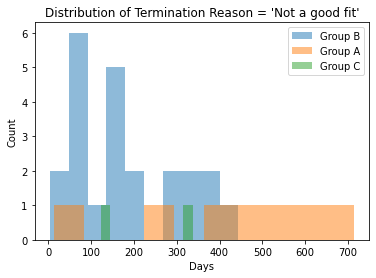

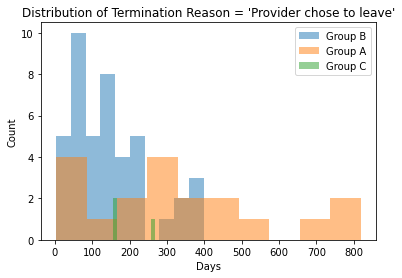

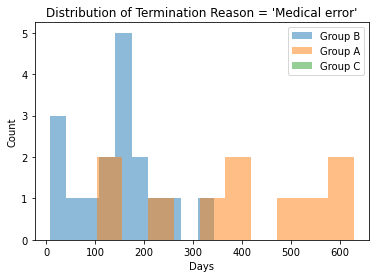

In [159]:
plt.hist(df_GroupB[df_GroupB['Termination Reason']=='Not a good fit']['days'], 
         alpha=0.5, 
         label='Group B',
         color='tab:blue')
plt.hist(df_GroupA[df_GroupA['Termination Reason']=='Not a good fit']['days'], 
         alpha=0.5, 
         label='Group A',
         color='tab:orange')
plt.hist(df_GroupC[df_GroupC['Termination Reason']=='Not a good fit']['days'], 
         alpha=0.5, 
         label='Group C',
         color='tab:green')
plt.title("Distribution of Termination Reason = 'Not a good fit'")
plt.xlabel("Days")
plt.ylabel("Count")
plt.legend()
plt.show()

plt.hist(df_GroupB[df_GroupB['Termination Reason']=='Provider chose to leave']['days'], 
         alpha=0.5, 
         label='Group B',
         color='tab:blue')
plt.hist(df_GroupA[df_GroupA['Termination Reason']=='Provider chose to leave']['days'], 
         alpha=0.5, 
         label='Group A',
         color='tab:orange')
plt.hist(df_GroupC[df_GroupC['Termination Reason']=='Provider chose to leave']['days'], 
         alpha=0.5, 
         label='Group C',
         color='tab:green')
plt.title("Distribution of Termination Reason = 'Provider chose to leave'")
plt.xlabel("Days")
plt.ylabel("Count")
plt.legend()
plt.show()

plt.hist(df_GroupB[df_GroupB['Termination Reason']=='Medical error']['days'], 
         alpha=0.5, 
         label='Group B',
         color='tab:blue')
plt.hist(df_GroupA[df_GroupA['Termination Reason']=='Medical error']['days'], 
         alpha=0.5, 
         label='Group A',
         color='tab:orange')
plt.hist(df_GroupC[df_GroupC['Termination Reason']=='Medical error']['days'], 
         alpha=0.5, 
         label='Group C',
         color='tab:green')
plt.title("Distribution of Termination Reason = 'Medical error'")
plt.xlabel("Days")
plt.ylabel("Count")
plt.legend()
plt.show()

**Group C** segmentation

because numbers are so small, Group C is hard to see in the overlayed histograms.

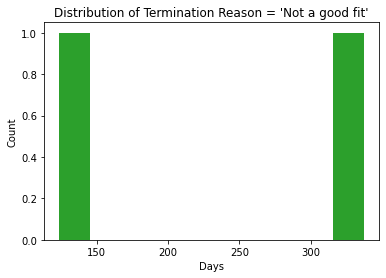

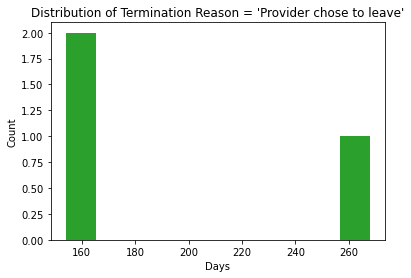

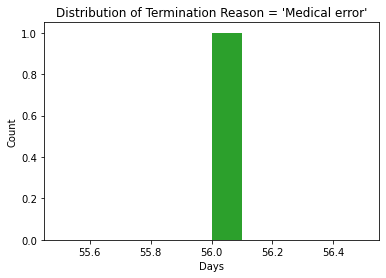

In [133]:
plt.hist(df_GroupC[df_GroupC['Termination Reason']=='Not a good fit']['days'], color='tab:green')
plt.title("Distribution of Termination Reason = 'Not a good fit'")
plt.xlabel("Days")
plt.ylabel("Count")
plt.show()

plt.hist(df_GroupC[df_GroupC['Termination Reason']=='Provider chose to leave']['days'], color='tab:green')
plt.title("Distribution of Termination Reason = 'Provider chose to leave'")
plt.xlabel("Days")
plt.ylabel("Count")
plt.show()

plt.hist(df_GroupC[df_GroupC['Termination Reason']=='Medical error']['days'], color='tab:green')
plt.title("Distribution of Termination Reason = 'Medical error'")
plt.xlabel("Days")
plt.ylabel("Count")
plt.show()